In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# models
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler
from sklearn.metrics import accuracy_score, classification_report

from sklearn.metrics import r2_score,mean_squared_error

import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier,plot_tree,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier,GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


In [5]:
data = pd.read_csv('../data/cardio_train.csv',sep=";")
data.drop("id",axis=1,inplace=True)

In [6]:
data.drop_duplicates(inplace=True)
data["age"] = data["age"] / 365
data["bmi"] = round(data["weight"] / (data["height"]/100)**2)
out_filter = ((data["ap_hi"]>250) | (data["ap_lo"]>200))
data = data[~out_filter]
data['age'] = data["age"].astype(int)

out_filter2 = ((data["ap_hi"] < 0) | (data["ap_lo"] < 0))
data = data[~out_filter2]

In [7]:
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,2,168,62.0,110,80,1,1,0,0,1,0,22.0
1,55,1,156,85.0,140,90,3,1,0,0,1,1,35.0
2,51,1,165,64.0,130,70,3,1,0,0,0,1,24.0
3,48,2,169,82.0,150,100,1,1,0,0,1,1,29.0
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0,27.0
69996,61,1,158,126.0,140,90,2,2,0,0,1,1,50.0
69997,52,2,183,105.0,180,90,3,1,0,1,0,1,31.0
69998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.0


In [8]:
data.to_csv('all-dataset-and-calculate-BMI.csv',index=False)

In [9]:
data.drop('height',axis=1,inplace=True)
data.drop('weight',axis=1,inplace=True)


In [10]:
data.to_csv('all-dataset-and-calculate-BMI-and-remove-height-weight.csv',index=False)

In [11]:
data

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,2,110,80,1,1,0,0,1,0,22.0
1,55,1,140,90,3,1,0,0,1,1,35.0
2,51,1,130,70,3,1,0,0,0,1,24.0
3,48,2,150,100,1,1,0,0,1,1,29.0
4,47,1,100,60,1,1,0,0,0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,120,80,1,1,1,0,1,0,27.0
69996,61,1,140,90,2,2,0,0,1,1,50.0
69997,52,2,180,90,3,1,0,1,0,1,31.0
69998,61,1,135,80,1,2,0,0,0,1,27.0


In [12]:
data['pulse_pressure'] = data['ap_hi'] - data['ap_lo']
data['pulse_pressure_index'] = data['pulse_pressure'] / data['ap_hi']

In [13]:
# data.drop("pulse_pressure",axis=1,inplace=True)
data.drop('ap_hi', axis=1, inplace=True, errors='ignore')
data.drop('ap_lo', axis=1, inplace=True, errors='ignore')


In [14]:
data.to_csv('all-dataset-and-calculate-BMI-remove-height-weight-api_hi-ap_lo-and-calculate_pulse_index.csv',index=False)

In [11]:
data

,age,gender,cholesterol,gluc,smoke,alco,active,cardio,bmi,pulse_pressure,pulse_pressure_index
0,50,2,1,1,0,0,1,0,21.967120,30,0.272727
1,55,1,3,1,0,0,1,1,34.927679,50,0.357143
2,51,1,3,1,0,0,0,1,23.507805,60,0.461538
3,48,2,1,1,0,0,1,1,28.710479,50,0.333333
4,47,1,1,1,0,0,0,0,23.011177,40,0.400000
...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,1,1,1,0,1,0,26.927438,40,0.333333
69996,61,1,2,2,0,0,1,1,50.472681,50,0.357143
69997,52,2,3,1,0,1,0,1,31.353579,90,0.500000
69998,61,1,1,2,0,0,0,1,27.099251,55,0.407407


<function matplotlib.pyplot.show(close=None, block=None)>

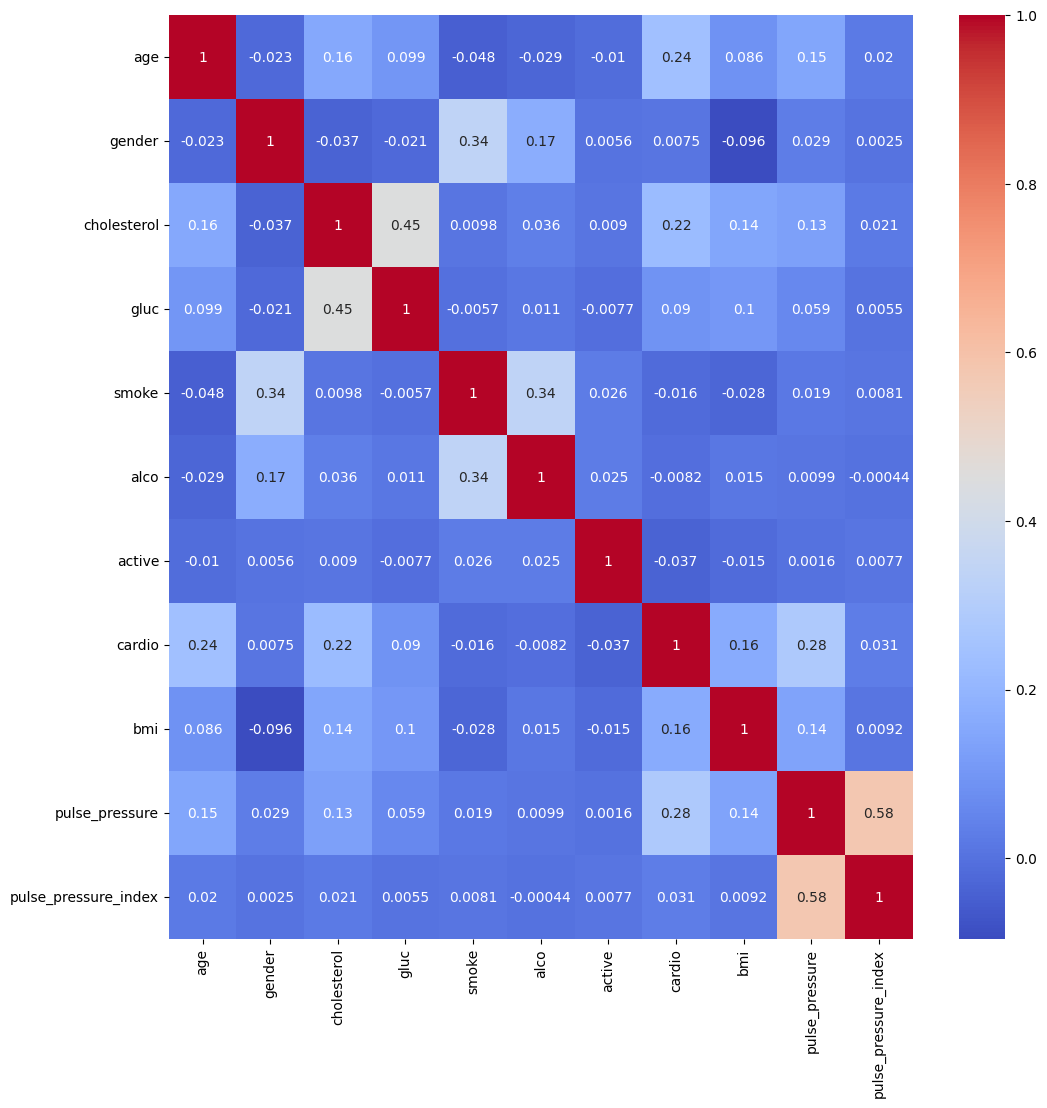

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)
plt.show

In [12]:
X = data.drop('cardio',axis=1)
y = data['cardio']

In [13]:
X = data.drop(['pulse_pressure','cardio'],axis=1)

In [19]:
X_train_model, x_test_model, y_train_model, y_test_model = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
scaler = StandardScaler()
X_train_model = scaler.fit_transform(X_train_model)
x_test_model = scaler.fit_transform(x_test_model)


In [24]:
from sklearn import ensemble

params = {
    'n_estimators': 500,
    'max_depth': 4,
    'min_samples_split': 5,
    'learning_rate': 0.01,
    'loss': 'squared_error',
}

grad = GradientBoostingRegressor(**params)
grad.fit(X_train_model,y_train_model)

print('The MSE on test set: {:.4f}'.format(mean_squared_error(y_test_model,grad.predict(x_test_model))))

The MSE on test set: 0.2025


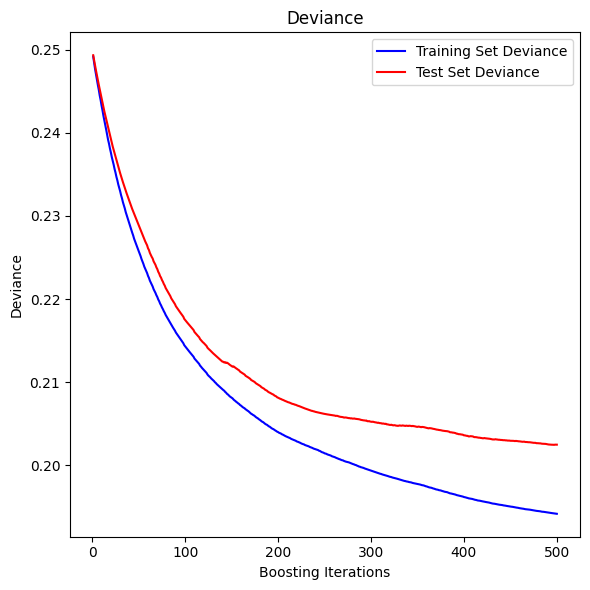

In [25]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(grad.staged_predict(x_test_model)):
    test_score[i] = mean_squared_error(y_test_model, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    grad.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

In [14]:
X_train,temp_X, y_train, temp_y = train_test_split(X,y,test_size=0.3,random_state=42)
X_val,X_test, y_val,y_test = train_test_split(temp_X,temp_y,test_size=0.5,random_state=42)

In [64]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [29]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=20000, solver='lbfgs', random_state=42),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    # "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "MLP Neural Network": MLPClassifier()
}

Training Logistic Regression...
Logistic Regression Accuracy: 0.64
Training Decision Tree...
Decision Tree Accuracy: 0.59
Training Random Forest...
Random Forest Accuracy: 0.65
Training KNN...
KNN Accuracy: 0.62
Training Gradient Boosting...
Gradient Boosting Accuracy: 0.69
Training XGBoost...
XGBoost Accuracy: 0.68
Training AdaBoost...


d:\Heart-Failure\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.69
Training Naive Bayes...
Naive Bayes Accuracy: 0.61
Training MLP Neural Network...
MLP Neural Network Accuracy: 0.66


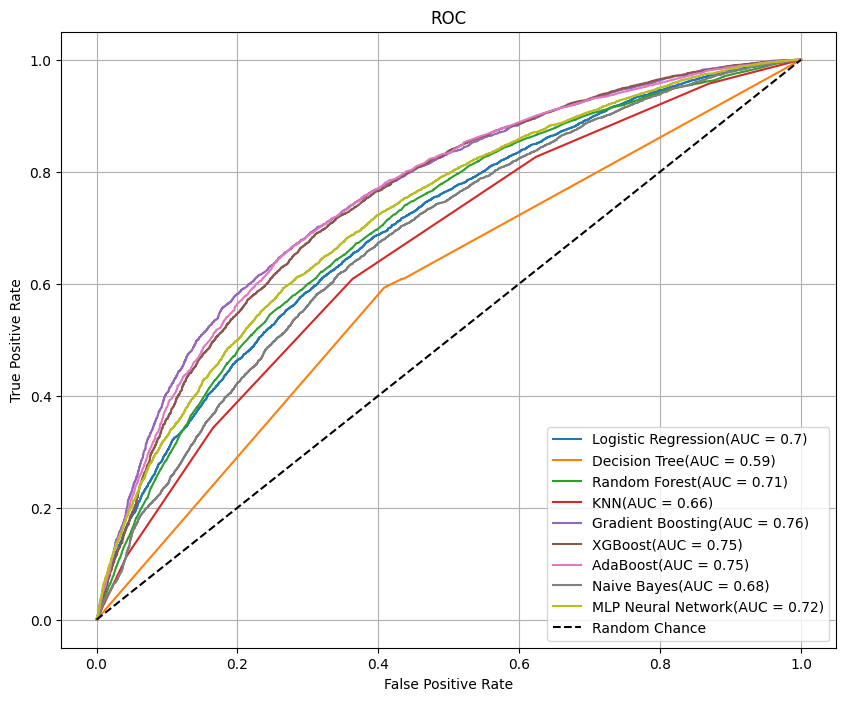

In [30]:
import json

from sklearn.metrics import roc_curve, auc

results = {}

plt.figure(figsize=(10,8))

for name, model in models.items():
    print(f"Training {name}...")
    model = model.fit(X_train_model, y_train_model)
    y_pred = model.predict(x_test_model)
    accuracy = accuracy_score(y_test_model, y_pred)
    
    print(f"{name} Accuracy: {np.round(accuracy, 2)}")
    report = classification_report(y_test_model, y_pred, output_dict=True)
    
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(x_test_model)[:,1]
        fpr, tpr, _ = roc_curve(y_test_model,y_prob)
        roc_auc = auc(fpr,tpr)

        plt.plot(fpr,tpr, label=f"{name}(AUC = {np.round(roc_auc,2)})")
    else:
        results[name] = {
            "accuracy": accuracy,
            "classification_report": report
        }
        print("f{name} does not support probability prediction")

plt.plot([0,1],[0,1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC")
plt.legend(loc='best')
plt.grid()
plt.show()


with open("all_model_results.json", "w") as f:
    json.dump(results, f, indent=4)


Training Logistic Regression...


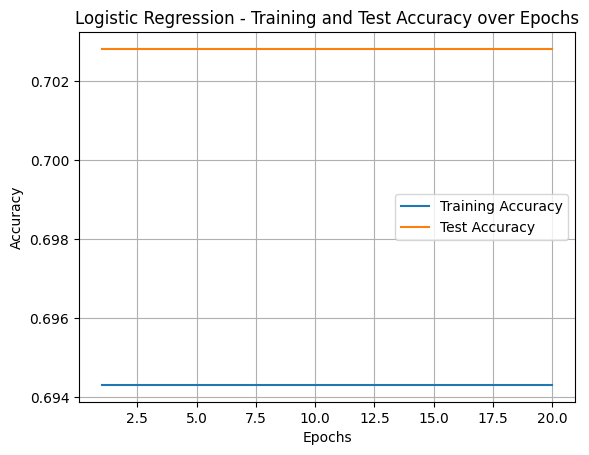

Logistic Regression Accuracy: 0.7
              precision    recall  f1-score   support

           0       0.69      0.76      0.72      5235
           1       0.73      0.64      0.68      5112

    accuracy                           0.70     10347
   macro avg       0.71      0.70      0.70     10347
weighted avg       0.71      0.70      0.70     10347

Training Decision Tree...


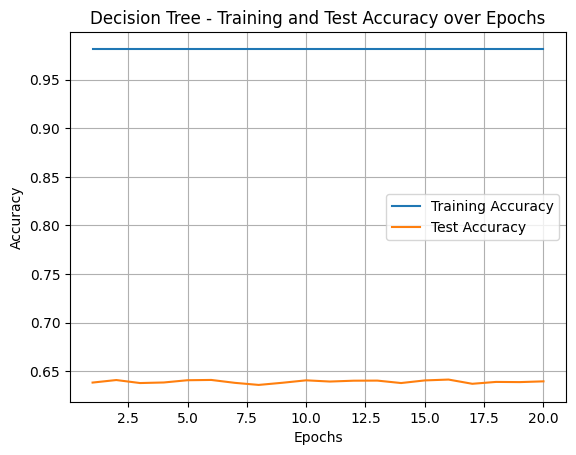

Decision Tree Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.64      0.65      0.65      5235
           1       0.64      0.63      0.63      5112

    accuracy                           0.64     10347
   macro avg       0.64      0.64      0.64     10347
weighted avg       0.64      0.64      0.64     10347

Training Random Forest...


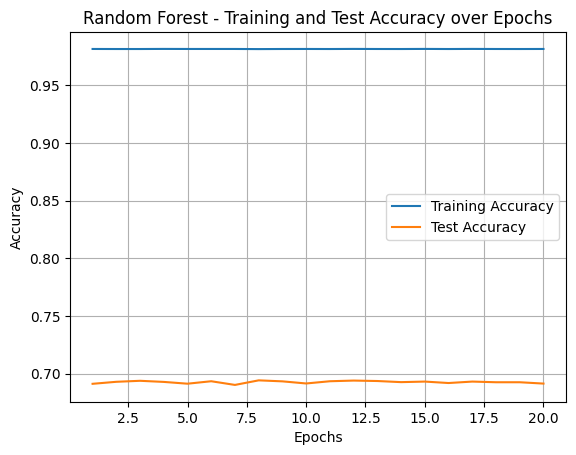

Random Forest Accuracy: 0.69
              precision    recall  f1-score   support

           0       0.70      0.69      0.69      5235
           1       0.69      0.69      0.69      5112

    accuracy                           0.69     10347
   macro avg       0.69      0.69      0.69     10347
weighted avg       0.69      0.69      0.69     10347

Training KNN...


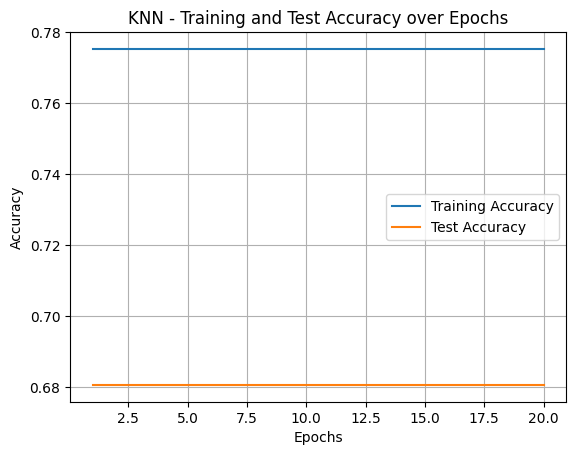

KNN Accuracy: 0.68
              precision    recall  f1-score   support

           0       0.68      0.69      0.69      5235
           1       0.68      0.67      0.68      5112

    accuracy                           0.68     10347
   macro avg       0.68      0.68      0.68     10347
weighted avg       0.68      0.68      0.68     10347

Training Gradient Boosting...


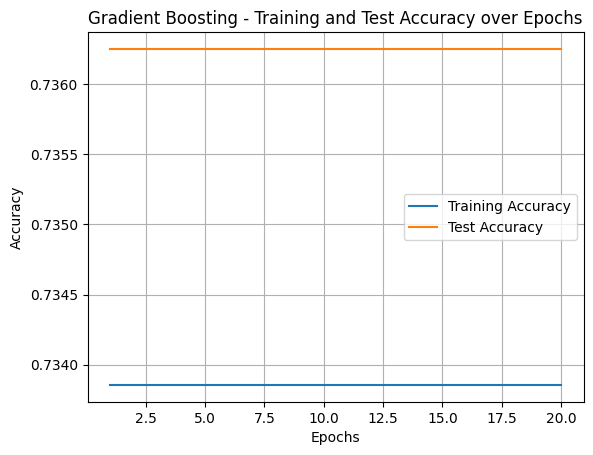

Gradient Boosting Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      5235
           1       0.77      0.67      0.71      5112

    accuracy                           0.74     10347
   macro avg       0.74      0.74      0.73     10347
weighted avg       0.74      0.74      0.74     10347

Training XGBoost...


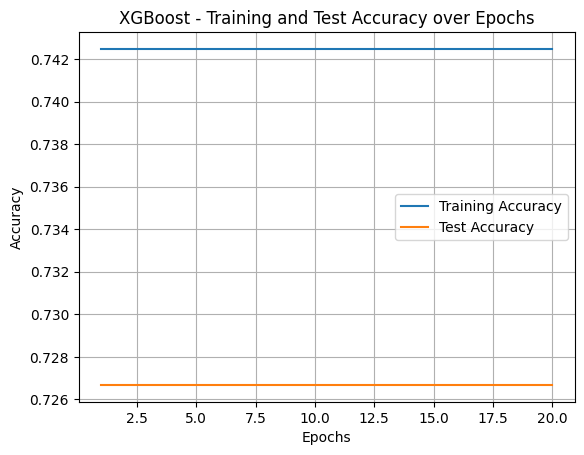

XGBoost Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.69      0.83      0.75      5235
           1       0.78      0.62      0.69      5112

    accuracy                           0.73     10347
   macro avg       0.74      0.73      0.72     10347
weighted avg       0.74      0.73      0.72     10347

Training AdaBoost...


d:\Heart-Failure\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Heart-Failure\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Heart-Failure\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Heart-Failure\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Heart-Failure\env\Lib\sit

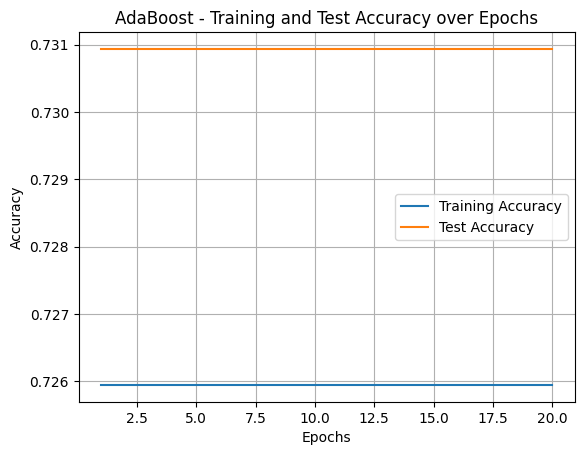

AdaBoost Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      5235
           1       0.76      0.66      0.71      5112

    accuracy                           0.73     10347
   macro avg       0.74      0.73      0.73     10347
weighted avg       0.73      0.73      0.73     10347

Training Naive Bayes...


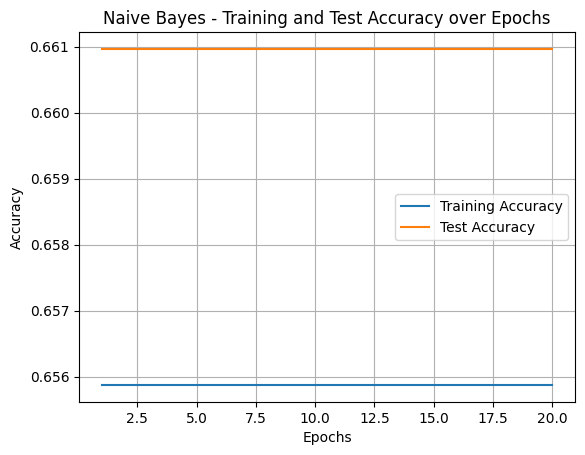

Naive Bayes Accuracy: 0.66
              precision    recall  f1-score   support

           0       0.63      0.82      0.71      5235
           1       0.73      0.50      0.59      5112

    accuracy                           0.66     10347
   macro avg       0.68      0.66      0.65     10347
weighted avg       0.68      0.66      0.65     10347

Training MLP Neural Network...


d:\Heart-Failure\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Heart-Failure\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


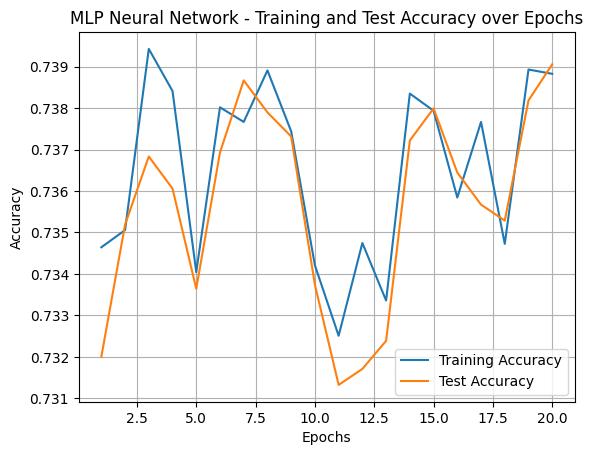

MLP Neural Network Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.73      0.77      0.75      5235
           1       0.75      0.71      0.73      5112

    accuracy                           0.74     10347
   macro avg       0.74      0.74      0.74     10347
weighted avg       0.74      0.74      0.74     10347



In [14]:
epochs = 20 
training_acc = []
test_acc = []

for name, model in models.items():
    print(f"Training {name}...")

    for epoch in range(epochs):
        model.fit(X_train, y_train)  

        training_acc.append(model.score(X_train, y_train))
        test_acc.append(model.score(X_test, y_test))

    plt.figure()
    plt.plot(range(1, epochs + 1), training_acc, label='Training Accuracy')
    plt.plot(range(1, epochs + 1), test_acc, label='Test Accuracy')
    plt.title(f'{name} - Training and Test Accuracy over Epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.grid(True)
    plt.legend()
    plt.show()

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {np.round(accuracy, 2)}")
    print(classification_report(y_test, y_pred))

    training_acc.clear()
    test_acc.clear()

In [65]:
mean_train = X_train.mean()
std_train = X_train.std()

X_train_scaled = (X_train - mean_train) / std_train
X_val_scaled = (X_val - mean_train ) / std_train
X_test_scaled = (X_train - mean_train) / std_train

In [16]:
depths = [20,30,50]
models = {}
for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth,random_state=42)
    model.fit(X_train_scaled,y_train)

    y_val_pred = model.predict(X_val_scaled)
    y_train_pred = model.predict(X_train_scaled)

    print(f"Depth: {depth}, Train MSE: {mean_squared_error(y_train,y_train_pred):.2f}, Validation MSE: {mean_squared_error(y_val, y_val_pred):.2f}")
    print(f"Depth: {depth}, Train R²: {r2_score(y_train, y_train_pred):.2f}, Validation R²: {r2_score(y_val, y_val_pred):.2f}")

d:\Heart-Failure\env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


Depth: 20, Train MSE: 0.08, Validation MSE: 0.44
Depth: 20, Train R²: 0.68, Validation R²: -0.78


d:\Heart-Failure\env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


Depth: 30, Train MSE: 0.02, Validation MSE: 0.44
Depth: 30, Train R²: 0.92, Validation R²: -0.77
Depth: 50, Train MSE: 0.01, Validation MSE: 0.44
Depth: 50, Train R²: 0.96, Validation R²: -0.77


d:\Heart-Failure\env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


Перевіряємо навчання моделі на поділенні датасету по статі на "Чоловіки"  та "Жінки"

In [14]:
data_male = data[data['gender'] == 2]
data_female = data[data['gender'] == 1]


In [66]:
X_female = data.drop(['pulse_pressure','gender','cardio'],axis=1)
y_female = data['cardio']

X_train_female, temp_X_fm, y_train_female, temp_y_fm = train_test_split(X_female,y_female,test_size=0.3, random_state=42)
X_val_female, X_test_female, y_val_female, y_test_female = train_test_split(temp_X_fm,temp_y_fm,test_size=0.5,random_state=42)

In [67]:
X_male = data.drop(['pulse_pressure','gender','cardio'],axis=1)
y_male = data['cardio']

X_train_male, temp_X_m, y_train_male, temp_y_m = train_test_split(X_male,y_male,test_size=0.3, random_state=42)
X_val_male, X_test_male, y_val_male, y_test_male = train_test_split(temp_X_m,temp_y_m,test_size=0.5,random_state=42)

In [68]:
X_train_male = scaler.fit_transform(X_train_male)
X_test_male = scaler.fit_transform(X_test_female)

X_train_female = scaler.fit_transform(X_train_female)
X_test_female = scaler.fit_transform(X_test_female)

In [69]:
X_male

,age,cholesterol,gluc,smoke,alco,active,bmi,pulse_pressure_index
0,50,1,1,0,0,1,21.967120,0.272727
1,55,3,1,0,0,1,34.927679,0.357143
2,51,3,1,0,0,0,23.507805,0.461538
3,48,1,1,0,0,1,28.710479,0.333333
4,47,1,1,0,0,0,23.011177,0.400000
...,...,...,...,...,...,...,...,...
69995,52,1,1,1,0,1,26.927438,0.333333
69996,61,2,2,0,0,1,50.472681,0.357143
69997,52,3,1,0,1,0,31.353579,0.500000
69998,61,1,2,0,0,0,27.099251,0.407407


<function matplotlib.pyplot.show(close=None, block=None)>

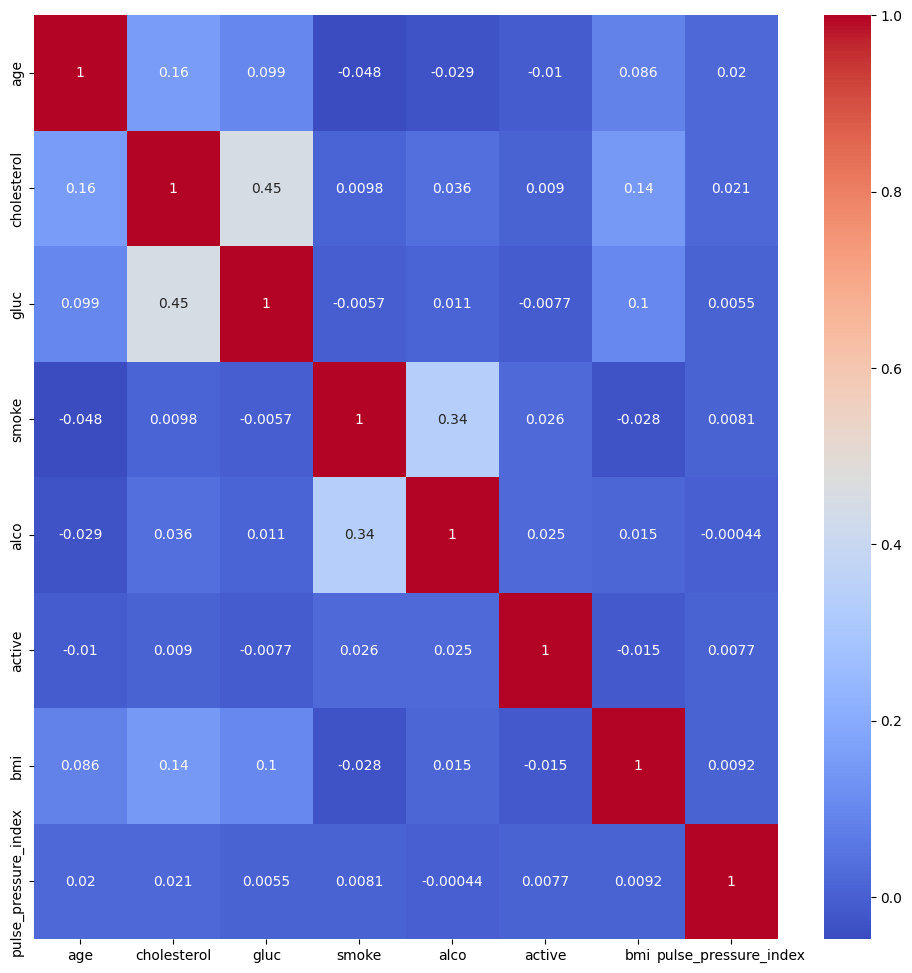

In [41]:
plt.figure(figsize=(12,12))
sns.heatmap(X_male.corr(),cmap='coolwarm',annot=True)
plt.show

In [60]:
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model = model.fit(X_train_female, y_train_female)
    y_pred = model.predict(X_test_female)
    accuracy = accuracy_score(y_test_female, y_pred)
    
    print(f"{name} Accuracy: {np.round(accuracy, 2)}")
    report = classification_report(y_test_female, y_pred, output_dict=True)
    
    results[name] = {
        "accuracy": accuracy,
        "classification_report": report
    }

with open("all_model_results_female.json", "w") as f:
    json.dump(results, f, indent=4)


Training Logistic Regression...
Logistic Regression Accuracy: 0.65
Training Decision Tree...
Decision Tree Accuracy: 0.6
Training Random Forest...
Random Forest Accuracy: 0.65
Training KNN...
KNN Accuracy: 0.63
Training Gradient Boosting...
Gradient Boosting Accuracy: 0.7
Training XGBoost...
XGBoost Accuracy: 0.68
Training AdaBoost...


d:\Heart-Failure\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.69
Training Naive Bayes...
Naive Bayes Accuracy: 0.62
Training MLP Neural Network...
MLP Neural Network Accuracy: 0.67


Training Logistic Regression...


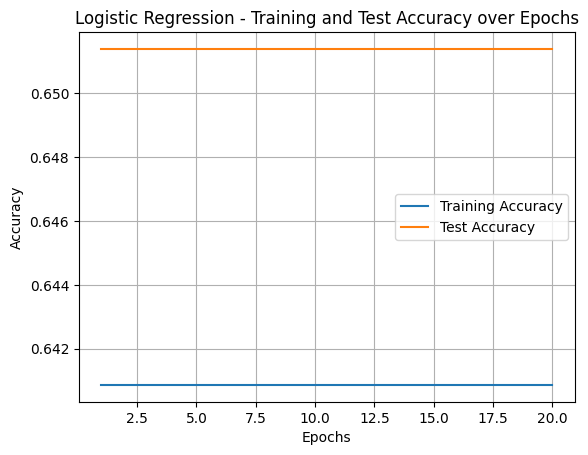

Logistic Regression Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.64      0.69      0.67      5235
           1       0.66      0.61      0.63      5112

    accuracy                           0.65     10347
   macro avg       0.65      0.65      0.65     10347
weighted avg       0.65      0.65      0.65     10347

Training Decision Tree...


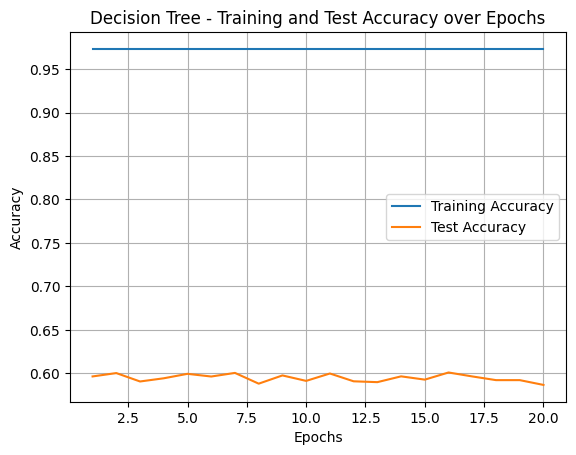

Decision Tree Accuracy: 0.59
              precision    recall  f1-score   support

           0       0.60      0.57      0.58      5235
           1       0.58      0.60      0.59      5112

    accuracy                           0.59     10347
   macro avg       0.59      0.59      0.59     10347
weighted avg       0.59      0.59      0.59     10347

Training Random Forest...


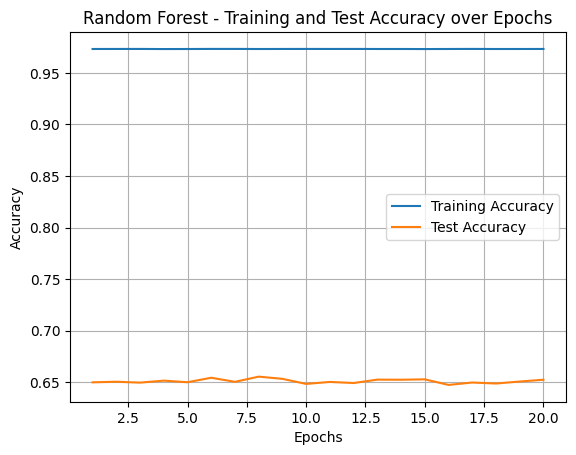

Random Forest Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.66      0.65      0.66      5235
           1       0.65      0.65      0.65      5112

    accuracy                           0.65     10347
   macro avg       0.65      0.65      0.65     10347
weighted avg       0.65      0.65      0.65     10347

Training KNN...


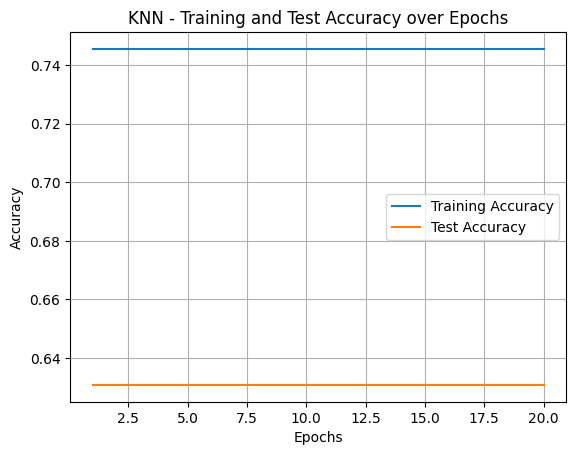

KNN Accuracy: 0.63
              precision    recall  f1-score   support

           0       0.63      0.64      0.64      5235
           1       0.63      0.63      0.63      5112

    accuracy                           0.63     10347
   macro avg       0.63      0.63      0.63     10347
weighted avg       0.63      0.63      0.63     10347

Training Gradient Boosting...


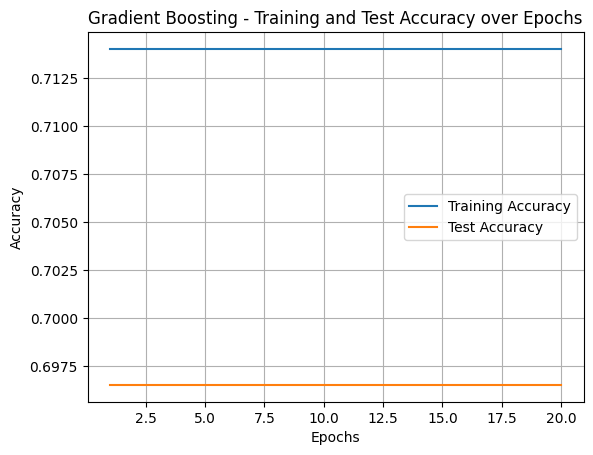

Gradient Boosting Accuracy: 0.7
              precision    recall  f1-score   support

           0       0.70      0.70      0.70      5235
           1       0.69      0.70      0.69      5112

    accuracy                           0.70     10347
   macro avg       0.70      0.70      0.70     10347
weighted avg       0.70      0.70      0.70     10347

Training XGBoost...


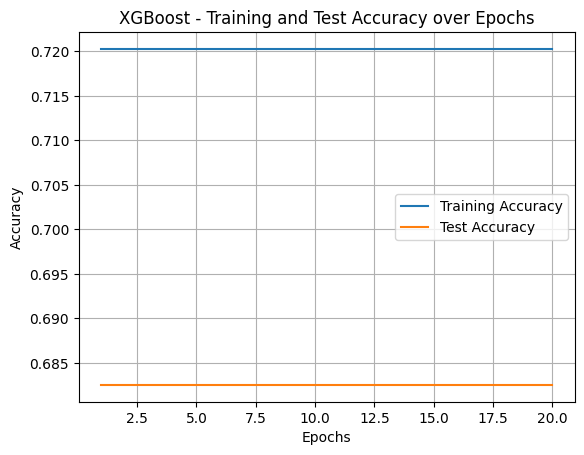

XGBoost Accuracy: 0.68
              precision    recall  f1-score   support

           0       0.66      0.78      0.71      5235
           1       0.72      0.58      0.64      5112

    accuracy                           0.68     10347
   macro avg       0.69      0.68      0.68     10347
weighted avg       0.69      0.68      0.68     10347

Training AdaBoost...


d:\Heart-Failure\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Heart-Failure\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Heart-Failure\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Heart-Failure\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Heart-Failure\env\Lib\sit

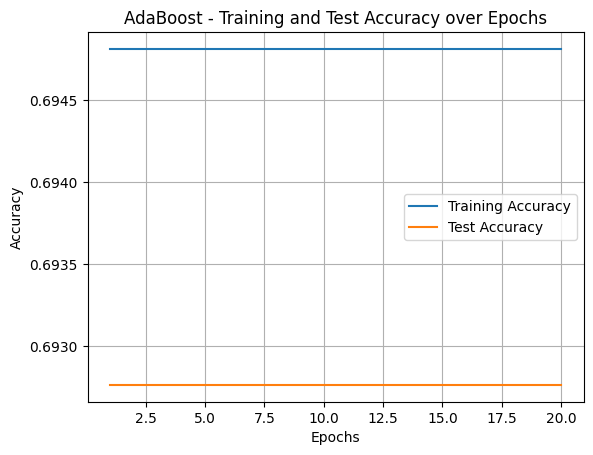

AdaBoost Accuracy: 0.69
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      5235
           1       0.69      0.68      0.69      5112

    accuracy                           0.69     10347
   macro avg       0.69      0.69      0.69     10347
weighted avg       0.69      0.69      0.69     10347

Training Naive Bayes...


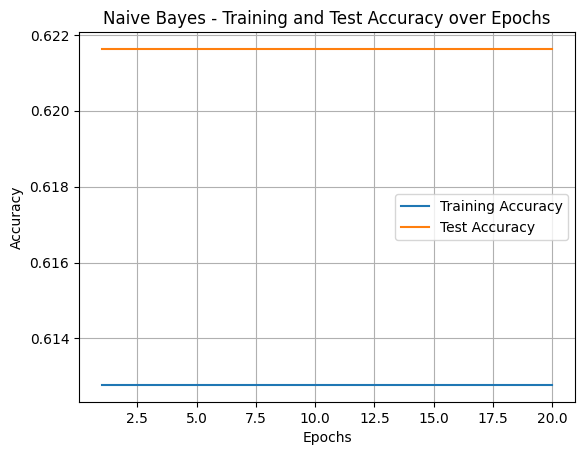

Naive Bayes Accuracy: 0.62
              precision    recall  f1-score   support

           0       0.59      0.81      0.68      5235
           1       0.69      0.43      0.53      5112

    accuracy                           0.62     10347
   macro avg       0.64      0.62      0.61     10347
weighted avg       0.64      0.62      0.61     10347

Training MLP Neural Network...


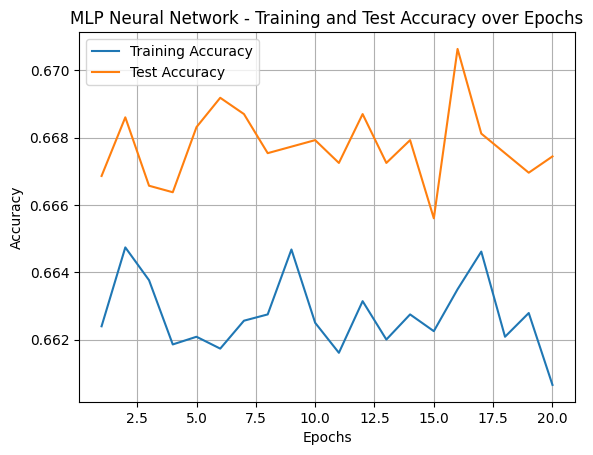

MLP Neural Network Accuracy: 0.67
              precision    recall  f1-score   support

           0       0.68      0.64      0.66      5235
           1       0.65      0.69      0.67      5112

    accuracy                           0.67     10347
   macro avg       0.67      0.67      0.67     10347
weighted avg       0.67      0.67      0.67     10347



In [51]:
epochs = 20
training_acc = []
test_acc = []

for name, model in models.items():
    print(f"Training {name}...")

    for epoch in range(epochs):
        model.fit(X_train_male, y_train_male)  

        training_acc.append(model.score(X_train_male, y_train_male))
        test_acc.append(model.score(X_test_male, y_test_male))

    plt.figure()
    plt.plot(range(1, epochs + 1), training_acc, label='Training Accuracy')
    plt.plot(range(1, epochs + 1), test_acc, label='Test Accuracy')
    plt.title(f'{name} - Training and Test Accuracy over Epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.grid(True)
    plt.legend()
    plt.show()

    y_pred_male = model.predict(X_test_male)
    accuracy = accuracy_score(y_test_male, y_pred_male)
    print(f"{name} Accuracy: {np.round(accuracy, 2)}")
    print(classification_report(y_test_male, y_pred_male))

    training_acc.clear()
    test_acc.clear()

Training Logistic Regression...


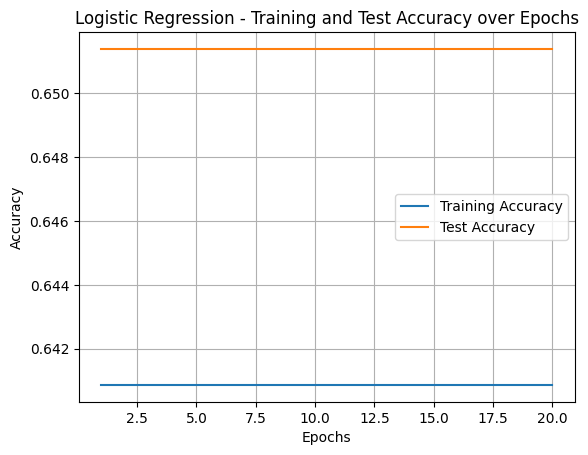

Logistic Regression Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.64      0.69      0.67      5235
           1       0.66      0.61      0.63      5112

    accuracy                           0.65     10347
   macro avg       0.65      0.65      0.65     10347
weighted avg       0.65      0.65      0.65     10347

Training Decision Tree...


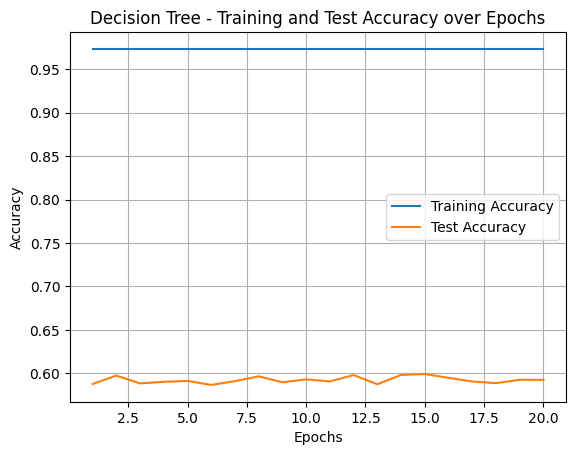

Decision Tree Accuracy: 0.59
              precision    recall  f1-score   support

           0       0.60      0.58      0.59      5235
           1       0.59      0.60      0.59      5112

    accuracy                           0.59     10347
   macro avg       0.59      0.59      0.59     10347
weighted avg       0.59      0.59      0.59     10347

Training Random Forest...


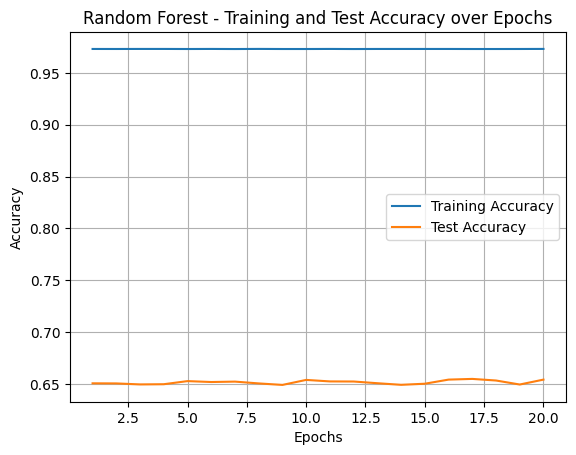

Random Forest Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.66      0.66      0.66      5235
           1       0.65      0.65      0.65      5112

    accuracy                           0.65     10347
   macro avg       0.65      0.65      0.65     10347
weighted avg       0.65      0.65      0.65     10347

Training KNN...


KeyboardInterrupt: 

In [19]:
epochs = 20
training_acc = []
test_acc = []

for name, model in models.items():
    print(f"Training {name}...")

    for epoch in range(epochs):
        model.fit(X_train_female, y_train_female)  

        training_acc.append(model.score(X_train_female, y_train_female))
        test_acc.append(model.score(X_test_female, y_test_female))

    plt.figure()
    plt.plot(range(1, epochs + 1), training_acc, label='Training Accuracy')
    plt.plot(range(1, epochs + 1), test_acc, label='Test Accuracy')
    plt.title(f'{name} - Training and Test Accuracy over Epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.grid(True)
    plt.legend()
    plt.show()

    y_pred_female = model.predict(X_test_female)
    accuracy = accuracy_score(y_test_female, y_pred_female)
    print(f"{name} Accuracy: {np.round(accuracy, 2)}")
    print(classification_report(y_test_female, y_pred_female))

    training_acc.clear()
    test_acc.clear()

Тут реалізація та дослідження ВАЖЛИВІСТЬ ОЗНАК з графіками на моделях

In [72]:
fi_male = RandomForestClassifier()
fi_male.fit(X_train_male,y_train_male)

fi_female = RandomForestClassifier()
fi_female.fit(X_train_female,y_train_female)

RandomForestClassifier()

In [47]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [76]:
from sklearn.inspection import permutation_importance

feature_names = [f"feature {i}" for i in range(X.shape[1])]

for i, col_name in enumerate(X.columns):
    print(f"{feature_names[i]}: {col_name}")

feature 0: age
feature 1: gender
feature 2: cholesterol
feature 3: gluc
feature 4: smoke
feature 5: alco
feature 6: active
feature 7: bmi
feature 8: pulse_pressure_index


In [77]:
import time

start_time = time.time()
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 1.054 seconds


In [78]:
start_time = time.time()
importances_male = fi_male.feature_importances_
std = np.std([tree.feature_importances_ for tree in fi_male.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.309 seconds


In [80]:
importances_male

array([0.16638929, 0.04507974, 0.01548696, 0.00755431, 0.00663607,
       0.00901832, 0.53414962, 0.2156857 ])

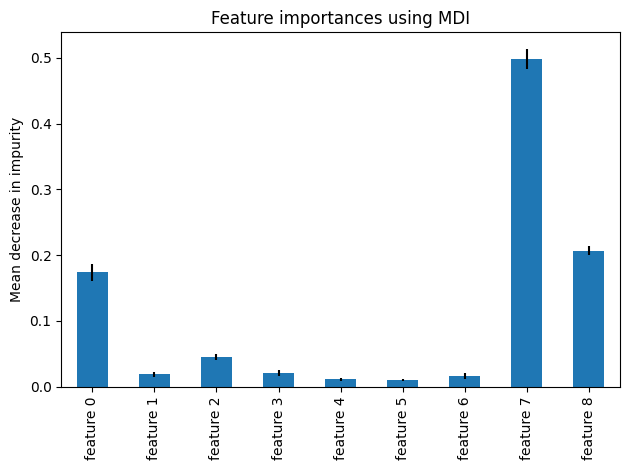

In [52]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()